# Group Comparsion

In [1]:
import pandas as pd

mlb = pd.read_csv('mlb.csv')

In [2]:
mlb.head()

,name,team,position,height,weight,age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [4]:
mlb.shape

(1034, 6)

In [5]:
mlb.describe()

,height,weight,age
count,1034.000000,1033.000000,1034.000000
mean,73.697292,201.689255,28.736712
std,2.305818,20.991491,4.320310
min,67.000000,150.000000,20.900000
25%,72.000000,187.000000,25.440000
50%,74.000000,200.000000,27.925000
75%,75.000000,215.000000,31.232500
max,83.000000,290.000000,48.520000


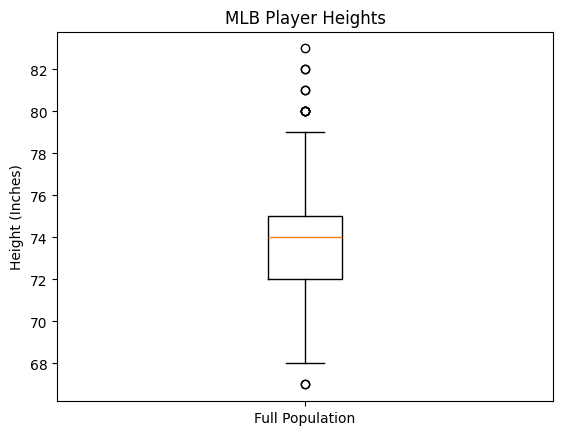

In [8]:
import matplotlib.pyplot as plt
plt.boxplot([mlb['height']])
plt.ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1],['Full Population'])
plt.show()